<a href="https://colab.research.google.com/github/bhushanmandava/Time-Series/blob/main/Phrophet_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
df = pd.read_csv('DHS_weekly.csv')

In [8]:
df = df.rename(columns={'Date':'ds','Total Individuals in Shelter':'y'})
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature
0,2014-01-05,354354,0,0,0,0.848000
1,2014-01-12,358103,0,0,0,3.257143
2,2014-01-19,359491,0,0,0,5.632857
3,2014-01-26,362880,0,0,0,-1.850000
4,2014-02-02,364125,0,0,0,1.177143


In [9]:
df.shape

(366, 6)

In [10]:
df_temp = df.copy()

In [14]:

df_temp.index.freq = 'W'

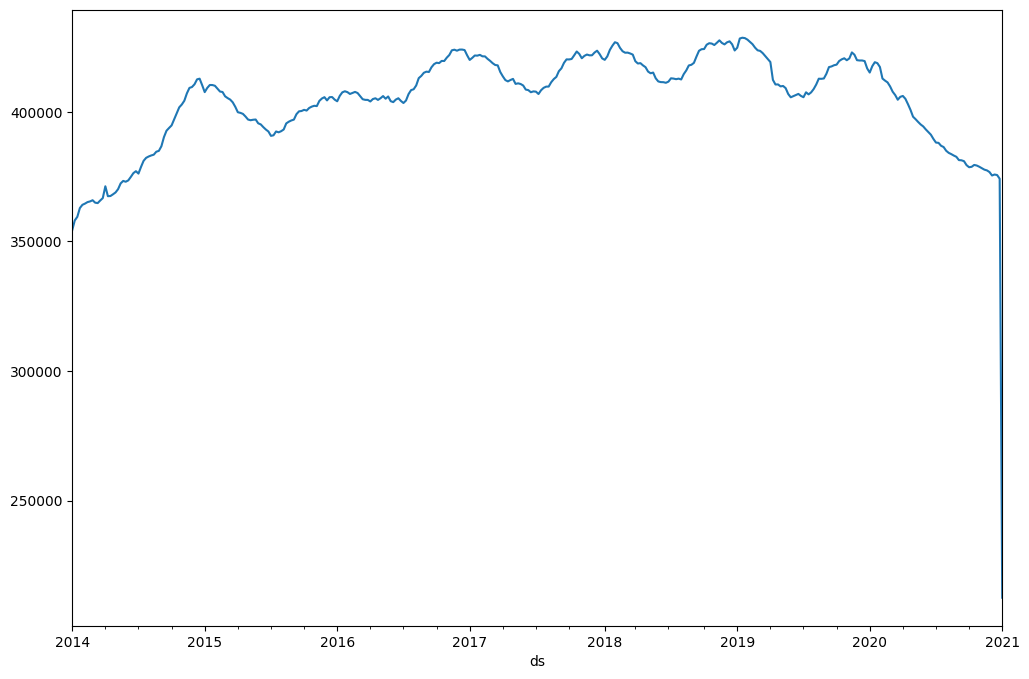

In [16]:
df_temp['y'].plot(figsize=(12,8))
plt.show()

In [17]:
df_temp.tail()

,y,Easter,Thanksgiving,Christmas,Temperature
ds,,,,,
2020-12-06,375444,0,0,0,10.072857
2020-12-13,375820,0,0,0,8.208571
2020-12-20,375615,0,0,0,3.535714
2020-12-27,374203,0,0,1,7.510000
2021-01-03,212514,0,0,0,6.625000


In [20]:
#now preparinng our holiday data frame
holidays = pd.DataFrame()
for holiday in ['Easter','Thanksgiving','Christmas']:
  temp = pd.DataFrame({
      'holiday' : holiday,
      'ds':df['ds'][df[holiday]==1],
      'lower_window':0,
      'upper_window':1
  })
  holidays =pd.concat([holidays,temp])

In [21]:
holidays

,holiday,ds,lower_window,upper_window
15,Easter,2014-04-20,0,1
65,Easter,2015-04-05,0,1
116,Easter,2016-03-27,0,1
171,Easter,2017-04-16,0,1
221,Easter,2018-04-01,0,1
276,Easter,2019-04-21,0,1
327,Easter,2020-04-12,0,1
47,Thanksgiving,2014-11-30,0,1
99,Thanksgiving,2015-11-29,0,1
151,Thanksgiving,2016-11-27,0,1


In [22]:
max_date = df['ds'].max()
split_date = max_date-pd.Timedelta(weeks =13)
train_df = df[df['ds'] <= split_date]
test_df = df[df['ds'] > split_date]

In [23]:
model = Prophet(holidays=holidays)
model.add_regressor('Temperature')
model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ys7pu6bz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/oalcuiam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43848', 'data', 'file=/tmp/tmp5j8ixkui/ys7pu6bz.json', 'init=/tmp/tmp5j8ixkui/oalcuiam.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model1l6uyhhx/prophet_model-20250425131604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future_df = model.make_future_dataframe(periods=13,freq='W')
future_df = future_df.merge(df[['ds','Temperature']],on='ds',how='left')
forecast = model.predict(future_df)

In [33]:
test_df

,y,Easter,Thanksgiving,Christmas,Temperature
ds,,,,,
2020-10-11,378796,0,0,0,19.912857
2020-10-18,379521,0,0,0,17.487143
2020-10-25,379293,0,0,0,18.472857
2020-11-01,378816,0,0,0,13.788571
2020-11-08,378271,0,0,0,15.451429
2020-11-15,377700,0,0,0,16.122857
2020-11-22,377413,0,0,0,11.210000
2020-11-29,376769,0,1,0,12.780000
2020-12-06,375444,0,0,0,10.072857


In [47]:
forecast.tail(100
              )

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Easter,Easter_lower,Easter_upper,Temperature,Temperature_lower,Temperature_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,error
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-10,420785.717008,424093.206396,430512.747383,420785.717008,420785.717008,0.000000,0.000000,0.000000,0.0,0.0,0.0,109.831335,109.831335,109.831335,0.0,0.0,0.0,6466.328541,6466.328541,6466.328541,109.831335,109.831335,109.831335,0.000000,0.000000,0.000000,6356.497206,6356.497206,6356.497206,0.0,0.0,0.0,427252.045548,NaN,NaN
2019-02-17,420776.579397,423105.669881,429663.548726,420776.579397,420776.579397,0.000000,0.000000,0.000000,0.0,0.0,0.0,121.952003,121.952003,121.952003,0.0,0.0,0.0,5433.302963,5433.302963,5433.302963,121.952003,121.952003,121.952003,0.000000,0.000000,0.000000,5311.350960,5311.350960,5311.350960,0.0,0.0,0.0,426209.882360,NaN,NaN
2019-02-24,420767.441787,422014.565862,428564.943310,420767.441787,420767.441787,0.000000,0.000000,0.000000,0.0,0.0,0.0,124.202746,124.202746,124.202746,0.0,0.0,0.0,4593.934344,4593.934344,4593.934344,124.202746,124.202746,124.202746,0.000000,0.000000,0.000000,4469.731598,4469.731598,4469.731598,0.0,0.0,0.0,425361.376131,NaN,NaN
2019-03-03,420758.304176,421318.992666,427638.092850,420758.304176,420758.304176,0.000000,0.000000,0.000000,0.0,0.0,0.0,147.543786,147.543786,147.543786,0.0,0.0,0.0,3794.486492,3794.486492,3794.486492,147.543786,147.543786,147.543786,0.000000,0.000000,0.000000,3646.942705,3646.942705,3646.942705,0.0,0.0,0.0,424552.790668,NaN,NaN
2019-03-10,420749.166566,420184.877276,426817.785837,420749.166566,420749.166566,0.000000,0.000000,0.000000,0.0,0.0,0.0,154.546098,154.546098,154.546098,0.0,0.0,0.0,2818.660677,2818.660677,2818.660677,154.546098,154.546098,154.546098,0.000000,0.000000,0.000000,2664.114579,2664.114579,2664.114579,0.0,0.0,0.0,423567.827243,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,387161.941579,392038.874360,398977.058125,386676.682185,387815.630362,0.000000,0.000000,0.000000,0.0,0.0,0.0,56.713796,56.713796,56.713796,0.0,0.0,0.0,8275.502605,8275.502605,8275.502605,56.713796,56.713796,56.713796,0.000000,0.000000,0.000000,8218.788808,8218.788808,8218.788808,0.0,0.0,0.0,395437.444184,375444.0,19993.444184
2020-12-13,386743.357684,391405.062868,398249.862628,386133.174180,387553.050697,0.000000,0.000000,0.000000,0.0,0.0,0.0,78.470980,78.470980,78.470980,0.0,0.0,0.0,8160.206832,8160.206832,8160.206832,78.470980,78.470980,78.470980,0.000000,0.000000,0.000000,8081.735852,8081.735852,8081.735852,0.0,0.0,0.0,394903.564515,375820.0,19083.564515
2020-12-20,386324.773788,390236.358015,396992.302031,385547.653343,387267.990068,0.000000,0.000000,0.000000,0.0,0.0,0.0,133.005653,133.005653,133.005653,0.0,0.0,0.0,7262.088755,7262.088755,7262.088755,133.005653,133.005653,133.005653,0.000000,0.000000,0.000000,7129.083102,7129.083102,7129.083102,0.0,0.0,0.0,393586.862543,375615.0,17971.862543


In [45]:
forecast.drop(columns='y',inplace=True)
forecast =forecast.join(test_df['y'])
forecast['error'] = (forecast['y'] - forecast['yhat']).abs()
mae = forecast['error'].mean()
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 29485.304917293375


In [46]:
from prophet.plot import plot_plotly
plot_plotly(model, forecast.reset_index())

In [48]:
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

In [49]:
fig_components = plot_components_plotly(model, forecast.reset_index())
fig_components.show()

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [50]:
import itertools


In [53]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
print(len(all_params))
rmses = []  # Store the RMSEs for each params here

54


In [57]:
rmses = []

for params in all_params:
    try:
        m = Prophet(holidays=holidays, **params).fit(train_df)

        df_cv = cross_validation(
            m,
            initial='1500 days',
            period='42 days',
            horizon='91 days',
            parallel="processes"
        )

        df_p = performance_metrics(df_cv, rolling_window=1)
        rmse_val = df_p['rmse'].values[0]
        print(f"Params: {params}, RMSE: {rmse_val}")
        rmses.append(rmse_val)

    except Exception as e:
        print(f"Error with params {params}: {e}")
        rmses.append(np.inf)  # So index matches all_params


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/2oapzpo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/s5det8x3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8420', 'data', 'file=/tmp/tmp5j8ixkui/2oapzpo2.json', 'init=/tmp/tmp5j8ixkui/s5det8x3.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model7uffm18j/prophet_model-20250425134643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cut

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5701.29315642041


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/03961l40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/5xru4dya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/5ojgt0dn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83034', 'data', 'file=/tmp/tmp5j8ixkui/03961l40.json', 'init=/tmp/tmp5j8ixkui/5ojgt0dn.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelqyz91kt9/prophet_model-20250425134649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/b8a38iyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21066', 'data

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5672.130492434535


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/de6ok9cn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4wsgjubi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/a0qpp2s9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57370', 'data', 'file=/tmp/tmp5j8ixkui/de6ok9cn.json', 'init=/tmp/tmp5j8ixkui/a0qpp2s9.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model2rcavax7/prophet_model-20250425134656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/725p1ec4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50061', 'data

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5684.730763614108


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/iupyhdwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/potm124j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/prwkfcf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/d3oimf6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97379', 'data', 'file=/tmp/tmp5j8ixkui/iupyhdwx.json', 'init=/tmp/tmp5j8ixkui/prwkfcf3.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelhpylw5ia/prophet_model-20250425134701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48378', 'data', 'file=/tmp/tmp5j8ixkui/potm124j.json', 'init=/tmp/tmp5j8ixkui/d3oimf6c.json', 'output', 'file=/t

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5675.5250730721955


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/32b5uy4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73289', 'data', 'file=/tmp/tmp5j8ixkui/d4i4sewb.json', 'init=/tmp/tmp5j8ixkui/32b5uy4c.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelvlwprowb/prophet_model-20250425134706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5fad9e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/3_2ugqo6.json
DEBUG:cmdstanpy:input tempfile:

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5707.064788238345


13:47:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f7e0d10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/zrwqhxud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ljj0uzj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6wtkeov0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/b1hanl0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94171', 'data', 'file=/tmp/tmp5j8ixkui/zrwqhxud.json', 'init=/tmp/tmp5j8ixkui/6wtkeov0.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelj96evunu/prophet_model-20250425134714.csv', 'method=optimize', 'algorithm=lbfg

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5662.6157203774565


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/lpixbl3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/pz4sqb01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/f7z320lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12982', 'data', 'file=/tmp/tmp5j8ixkui/pz4sqb01.json', 'init=/tmp/tmp5j8ixkui/f7z320lv.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelmv2ra8li/prophet_model-20250425134719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:19 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hv0v3hw1.json
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7640', 'data'

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5696.64030655256


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/l5f1fw1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/he24jsky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/8sa1g7id.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4wly1xnc.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35550', 'data', 'file=/tmp/tmp5j8ixkui/l5f1fw1l.json', 'init=/tmp/tmp5j8ixkui/8sa1g7id.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelrbab6fpj/prophet_model-20250425134724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:24 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 0
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20040', 'data

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5667.036849989666


13:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f92a210>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6x1v7ooi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/fwmbnoqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/p3vb2cv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67265', 'data', 'file=/tmp/tmp5j8ixkui/6x1v7ooi.json', 'init=/tmp/tmp5j8ixkui/p3vb2cv1.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model2tdq46i0/prophet_model-20250425134730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5702.098631019837


INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f8761d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/0h2n_p8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/dvroxwda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hiir3lhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77081', 'data', 'file=/tmp/tmp5j8ixkui/0h2n_p8u.json', 'init=/tmp/tmp5j8ixkui/hiir3lhd.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelray2kgun/prophet_model-20250425134738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/_fjv7pbo.json
DE

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5653.729661942809


13:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f889f10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/l91l8izv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/5g3kycs5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/t_fkyz50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/r9n16c05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60687', 'data', 'file=/tmp/tmp5j8ixkui/l91l8izv.json', 'init=/tmp/tmp5j8ixkui/t_fkyz50.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model7e7i5lmi/prophet_model-20250425134745.csv', 'method=optimize', 'algorithm=lbfg

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5699.193796661447


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/8d3homc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/bkgxuxa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/isziq11m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67665', 'data', 'file=/tmp/tmp5j8ixkui/bkgxuxa7.json', 'init=/tmp/tmp5j8ixkui/isziq11m.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model42hpl6o5/prophet_model-20250425134750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/3hfo1sd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30916', 'data

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5686.816998213898


13:47:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb616604d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/zj2nobts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/31ydrfpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/n6a_ityu.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72353', 'data', 'file=/tmp/tmp5j8ixkui/zj2nobts.json', 'init=/tmp/tmp5j8ixkui/31ydrfpo.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelu68fjvyh/prophet_model-20250425134755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5700.431249838708


13:48:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb6179da10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9rxspzr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ezgjnfsl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4mnmf28o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4kabd2nb.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40797', 'data', 'file=/tmp/tmp5j8ixkui/9rxspzr6.json', 'init=/tmp/tmp5j8ixkui/4mnmf28o.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelfklhbz2d/prophet_model-20250425134802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:4

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5674.7806251488155


13:48:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f999090>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/og6wsjgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/tqfhmorp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=222', 'data', 'file=/tmp/tmp5j8ixkui/og6wsjgr.json', 'init=/tmp/tmp5j8ixkui/tqfhmorp.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model9udc566y/prophet_model-20250425134809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5717.979267587105


13:48:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb61f1cc10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4rilxbrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/azf515n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/b0uxicpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90821', 'data', 'file=/tmp/tmp5j8ixkui/4rilxbrr.json', 'init=/tmp/tmp5j8ixkui/b0uxicpj.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelm0gkxvfr/prophet_model-20250425134816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5683.205956513508


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f728510>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/22l8bulp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4v9och3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6hlnw3il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43323', 'data', 'file=/tmp/tmp5j8ixkui/22l8bulp.json', 'init=/tmp/tmp5j8ixkui/6hlnw3il.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modeleja0iexi/prophet_model-20250425134822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/rxcdmluz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan arg

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5748.562347993557


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/qs7r9g8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xcqmkg9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/iwrehay8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57305', 'data', 'file=/tmp/tmp5j8ixkui/xcqmkg9p.json', 'init=/tmp/tmp5j8ixkui/iwrehay8.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model5a6f0p6f/prophet_model-20250425134827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hvwvl1yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88349', 'data

Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5678.815029422196


13:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f8e7090>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/mr9rlg27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/mk_yitlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/8zwabohr.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80797', 'data', 'file=/tmp/tmp5j8ixkui/mr9rlg27.json', 'init=/tmp/tmp5j8ixkui/mk_yitlp.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelatkqh7n6/prophet_model-20250425134834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:34 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmds

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5267.216746035254


13:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f7e8ed0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/zx_5um3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/0o9cd5mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61183', 'data', 'file=/tmp/tmp5j8ixkui/zx_5um3r.json', 'init=/tmp/tmp5j8ixkui/0o9cd5mg.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model48z5wjrk/prophet_model-20250425134846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ri822_x1.json
13:48:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5269.5412544125875


13:48:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb61959950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/bxitlju4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/5djbkres.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/98gu19jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15074', 'data', 'file=/tmp/tmp5j8ixkui/5djbkres.json', 'init=/tmp/tmp5j8ixkui/98gu19jq.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelpxrubp1f/prophet_model-20250425134854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5264.221948519192


13:49:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f84be10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xq9vbk2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/y3rxk6s7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/90muqjbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75709', 'data', 'file=/tmp/tmp5j8ixkui/xq9vbk2_.json', 'init=/tmp/tmp5j8ixkui/y3rxk6s7.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model5m0312wk/prophet_model-20250425134904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5270.222407067174


13:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f83d710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/v85e_cuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/yekfaiuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/39egyqbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12045', 'data', 'file=/tmp/tmp5j8ixkui/yekfaiuw.json', 'init=/tmp/tmp5j8ixkui/39egyqbi.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modellr4agd45/prophet_model-20250425134915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5275.334843380283


13:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f7a8890>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/z4c7ikaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6wy9l_yy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/vnmd47_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xcfuipze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7296', 'data', 'file=/tmp/tmp5j8ixkui/6wy9l_yy.json', 'init=/tmp/tmp5j8ixkui/vnmd47_v.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelo69a797r/prophet_model-20250

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5271.050831534051


13:49:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb61798390>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/sgwy592a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9tv55d53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/et_zo4g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6mk5mu6a.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27869', 'data', 'file=/tmp/tmp5j8ixkui/sgwy592a.json', 'init=/tmp/tmp5j8ixkui/et_zo4g0.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modeljmc0k20w/prophet_model-20250425134934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBU

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5260.390015946778


13:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f8a3ad0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/w673c9x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9_51rd7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/zc1z11zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61774', 'data', 'file=/tmp/tmp5j8ixkui/9_51rd7y.json', 'init=/tmp/tmp5j8ixkui/zc1z11zr.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelshfpssga/prophet_model-20250425134943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5269.803044426033


13:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5faf3d50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/uz1hjqm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/kukjn7hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/434877gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/sbvevlu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76085', 'data', 'file=/tmp/tmp5j8ixkui/uz1hjqm3.json', 'init=/tmp/tmp5j8ixkui/434877gk.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model11d66jvm/prophet_model-20250425134952.csv', 'method=optimize', 'algorithm=lbfg

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5271.32809561567


13:50:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb61520710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/wufa__r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/r_x34pex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ni0q0oqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88046', 'data', 'file=/tmp/tmp5j8ixkui/wufa__r8.json', 'init=/tmp/tmp5j8ixkui/ni0q0oqc.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modeldx5qoa2c/prophet_model-20250425135003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5266.486455205494


13:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb615893d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hrfgx4j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/yqhlt3xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9m6t7h1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35450', 'data', 'file=/tmp/tmp5j8ixkui/hrfgx4j1.json', 'init=/tmp/tmp5j8ixkui/9m6t7h1s.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model8344bvzk/prophet_model-20250425135011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5270.256336319728


13:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f78ea90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/lbdpfbxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/iqwnip_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/vgcac7d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ngd1kn6q.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13320', 'data', 'file=/tmp/tmp5j8ixkui/lbdpfbxl.json', 'init=/tmp/tmp5j8ixkui/vgcac7d3.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelyimcghdv/prophet_model-20250425135023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBU

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5273.7383666075475


13:50:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f9b0610>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ms2wkzic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/wkgimv8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/e_ifohc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43474', 'data', 'file=/tmp/tmp5j8ixkui/wkgimv8e.json', 'init=/tmp/tmp5j8ixkui/e_ifohc4.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model31nr6bue/prophet_model-20250425135032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5266.710144702965


13:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f87d710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/n20j9n8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9l0z6497.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/u43ljd9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/lqudz0r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97311', 'data', 'file=/tmp/tmp5j8ixkui/n20j9n8f.json', 'init=/tmp/tmp5j8ixkui/u43ljd9u.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelyplc6knv/prophet_model-20250425135043.csv', 'method=optimize', 'algorithm=lbfg

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5270.8861067474445


13:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f7a8890>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ly4k8lfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/5hulmffj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/i6l9gl6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74154', 'data', 'file=/tmp/tmp5j8ixkui/ly4k8lfm.json', 'init=/tmp/tmp5j8ixkui/i6l9gl6g.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model1_b0l8pw/prophet_model-20250425135053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5265.729651468656


13:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f809590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/i17gc99j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/b2hjrag0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/8wo72g79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67954', 'data', 'file=/tmp/tmp5j8ixkui/i17gc99j.json', 'init=/tmp/tmp5j8ixkui/8wo72g79.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelim92jnbk/prophet_model-20250425135103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hcylm0vw.json
13:5

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5267.0227640276635


13:51:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5faf13d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/2csco9g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/j5s2io_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/4suz9tib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42930', 'data', 'file=/tmp/tmp5j8ixkui/2csco9g3.json', 'init=/tmp/tmp5j8ixkui/4suz9tib.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelq2ij9u8v/prophet_model-20250425135114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5271.913247049885


13:51:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f7a25d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/pt0q3w70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ushwm6wn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/auuucy2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/it72f2ud.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9196', 'data', 'file=/tmp/tmp5j8ixkui/pt0q3w70.json', 'init=/tmp/tmp5j8ixkui/auuucy2z.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelatjagodu/prophet_model-20250

Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5274.53699590882


13:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f5895d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/udj_gosu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/l0wph_qx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/gnz609k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90821', 'data', 'file=/tmp/tmp5j8ixkui/udj_gosu.json', 'init=/tmp/tmp5j8ixkui/gnz609k0.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelaxjbrrha/prophet_model-20250425135134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:34 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmds

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5191.891137234763


13:51:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f97bad0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/cb4_n9m_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/szk7beh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/2vtf2vjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70536', 'data', 'file=/tmp/tmp5j8ixkui/cb4_n9m_.json', 'init=/tmp/tmp5j8ixkui/2vtf2vjb.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modeljgufle8f/prophet_model-20250425135144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/i5fnz8yy.json
13:5

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5187.210024758991


13:51:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb618d26d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/2r4ozg7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/f19xhmo0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/jjz16zng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5123', 'data', 'file=/tmp/tmp5j8ixkui/2r4ozg7x.json', 'init=/tmp/tmp5j8ixkui/jjz16zng.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelwo7zouqs/prophet_model-20250425135154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/8b32hi3q.json
13:51

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5188.6554220096905


13:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f808990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9vkv5jqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/qms9rba5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/9djpj1by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/375owkib.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29496', 'data', 'file=/tmp/tmp5j8ixkui/9vkv5jqs.json', 'init=/tmp/tmp5j8ixkui/9djpj1by.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model9tvws3ok/prophet_model-20250425135205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBU

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5182.89558443482


13:52:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb6158cc10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/635mv86w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/61zug6yr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/letded00.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71853', 'data', 'file=/tmp/tmp5j8ixkui/635mv86w.json', 'init=/tmp/tmp5j8ixkui/61zug6yr.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model9bgnngsd/prophet_model-20250425135215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:52:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5191.859346857869


13:52:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f585310>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/02k0w0xx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/tqiqhlqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/vjidykgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ed0otrtm.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63021', 'data', 'file=/tmp/tmp5j8ixkui/02k0w0xx.json', 'init=/tmp/tmp5j8ixkui/vjidykgc.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model5zzcjre3/prophet_model-20250425135227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:5

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5182.148567981722


13:52:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f5b06d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/bpm4burf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ilrols0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/7z4z77vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ir4euup6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63217', 'data', 'file=/tmp/tmp5j8ixkui/bpm4burf.json', 'init=/tmp/tmp5j8ixkui/7z4z77vb.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model6_2kt3ss/prophet_model-2025

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5203.65030711515


13:52:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f859290>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/pkdmpp9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/nildr_m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/cif1kvh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28603', 'data', 'file=/tmp/tmp5j8ixkui/pkdmpp9i.json', 'init=/tmp/tmp5j8ixkui/cif1kvh9.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelvm2hblph/prophet_model-20250425135248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/7jxjora7.json
13:5

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5184.429973671244


13:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f6ed910>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/91g_of37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/vpv3eey5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/jjkk8kxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/84_27tq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9424', 'data', 'file=/tmp/tmp5j8ixkui/91g_of37.json', 'init=/tmp/tmp5j8ixkui/jjkk8kxr.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelhvo87aoh/prophet_model-20250425135257.csv', 'method=optimize', 'algorithm=lbfgs

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5194.427803480687


13:53:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f8affd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/yfykg1c8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xxo3dwt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/3ajv3xdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35729', 'data', 'file=/tmp/tmp5j8ixkui/yfykg1c8.json', 'init=/tmp/tmp5j8ixkui/3ajv3xdh.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelp_kv8_wi/prophet_model-20250425135309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:09 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmds

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5184.30848863242


13:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f83d390>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/_os0n2uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/7snk2nnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ixanxzyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35070', 'data', 'file=/tmp/tmp5j8ixkui/_os0n2uc.json', 'init=/tmp/tmp5j8ixkui/ixanxzyo.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelyakh6eao/prophet_model-20250425135319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:19 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmds

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5193.269717924956


13:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f9a5590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/qlvj8qvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/j81e6_ad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/qhv7wcp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/rqpu5djc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11619', 'data', 'file=/tmp/tmp5j8ixkui/qlvj8qvf.json', 'init=/tmp/tmp5j8ixkui/qhv7wcp7.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model5v5gspi2/prophet_model-2025

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5181.766999914731


13:53:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f55b590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/m38b3s2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/rrx7dsu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/vk0x34f8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6908', 'data', 'file=/tmp/tmp5j8ixkui/rrx7dsu9.json', 'init=/tmp/tmp5j8ixkui/vk0x34f8.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model4c4p8oc4/prophet_model-20250425135341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}, RMSE: 5193.312851126661


13:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f83eed0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/x0hngc27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/ctuz8ba2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/1xq8oc24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84830', 'data', 'file=/tmp/tmp5j8ixkui/x0hngc27.json', 'init=/tmp/tmp5j8ixkui/1xq8oc24.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelep63l8ba/prophet_model-20250425135352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, RMSE: 5191.724641365413


13:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb6158d4d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xhxbo61n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/hjzt1ms4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/zpq_ezh_.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26564', 'data', 'file=/tmp/tmp5j8ixkui/xhxbo61n.json', 'init=/tmp/tmp5j8ixkui/hjzt1ms4.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model1bq_fd4g/prophet_model-20250425135403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}, RMSE: 5204.4890581644195


13:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f81d790>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/prqigrb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/0j986bjy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/xb_rs3qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/33x7wkod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66022', 'data', 'file=/tmp/tmp5j8ixkui/prqigrb8.json', 'init=/tmp/tmp5j8ixkui/xb_rs3qj.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_model4u9ws6nw/prophet_model-2025

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5182.358796902961


13:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f8d19d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/49k4h2ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/fkuqk55y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/3s19lwn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10895', 'data', 'file=/tmp/tmp5j8ixkui/49k4h2ll.json', 'init=/tmp/tmp5j8ixkui/3s19lwn_.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelhow3l7an/prophet_model-20250425135425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:25 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmds

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}, RMSE: 5184.348453175812


13:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2018-03-18 00:00:00 and 2020-07-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bbb5f998410>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/wwf52xi4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/n23tl67p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/sr92z8nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23465', 'data', 'file=/tmp/tmp5j8ixkui/n23tl67p.json', 'init=/tmp/tmp5j8ixkui/sr92z8nq.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelb7yqabux/prophet_model-20250425135434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdst

Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}, RMSE: 5181.017877337612


In [58]:
print(type(rmses))
print(rmses)

<class 'list'>
[np.float64(5701.29315642041), np.float64(5672.130492434535), np.float64(5684.730763614108), np.float64(5675.5250730721955), np.float64(5707.064788238345), np.float64(5662.6157203774565), np.float64(5696.64030655256), np.float64(5667.036849989666), np.float64(5702.098631019837), np.float64(5653.729661942809), np.float64(5699.193796661447), np.float64(5686.816998213898), np.float64(5700.431249838708), np.float64(5674.7806251488155), np.float64(5717.979267587105), np.float64(5683.205956513508), np.float64(5748.562347993557), np.float64(5678.815029422196), np.float64(5267.216746035254), np.float64(5269.5412544125875), np.float64(5264.221948519192), np.float64(5270.222407067174), np.float64(5275.334843380283), np.float64(5271.050831534051), np.float64(5260.390015946778), np.float64(5269.803044426033), np.float64(5271.32809561567), np.float64(5266.486455205494), np.float64(5270.256336319728), np.float64(5273.7383666075475), np.float64(5266.710144702965), np.float64(5270.88610

In [59]:
best_params = all_params[np.argmin(rmses)]
print('Best Parameters:', best_params)

Best Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


In [61]:
model_finetuned = Prophet(
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    seasonality_mode='multiplicative'
)

In [62]:
model_finetuned = Prophet(holidays=holidays)
model_finetuned.add_regressor('Temperature')
model_finetuned.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/k9wfxubo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j8ixkui/6n9ugen4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34700', 'data', 'file=/tmp/tmp5j8ixkui/k9wfxubo.json', 'init=/tmp/tmp5j8ixkui/6n9ugen4.json', 'output', 'file=/tmp/tmp5j8ixkui/prophet_modelbrmfchfi/prophet_model-20250425135757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [66]:
future_df1 = model.make_future_dataframe(periods=13, freq='W')  # Generate future dates for 13 weeks

# Include the regressors in the future dataframe
future_df1 = future_df1.merge(df[['ds', 'Temperature']], on='ds', how='left')
forecast1 = model_finetuned.predict(future_df1)

In [67]:
forecast1.set_index('ds', inplace=True)  # Set the index of forecast to 'ds' (date)
forecast1 = forecast1.join(test_df['y']   )  # Join the actual 'y' values from the test set to the forecast dataframe

# Calculate mean absolute error
forecast1['error'] = (forecast1['y'] - forecast1['yhat']).abs()  # Calculate the absolute error between actual and predicted values
mae = forecast1['error'].mean()  # Calculate the mean of the absolute errors
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 29485.304917293375


In [69]:
from prophet.plot import plot_plotly
plot_plotly(model_finetuned, forecast1.reset_index())